## Examen Angelica Yazmin Mendoza Pantoja

In [2]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Tuve unos problemas tecnicos que al momento de poner df_flights = pd.read_csv('flights.csv'), aparecía que no existía, 
# así que cree uno desde el mismo código para generar un archivo CSV y apareciera en mi directorio de trabajo actual
# para ver si si estaba mi archivo en el directorio de Vanguardia corrí el siguiente código:

import os
print(os.getcwd())  # Esto imprimirá el directorio actual



c:\Users\Angelica Yazmin\Desktop\Vanguardia


In [9]:
# Con esto cree el mismo código 
import pandas as pd

data = {
    'Year': [2013, 2013, 2013],
    'Month': [1, 2, 3],
    'DayofMonth': [1, 15, 22],
    'DayOfWeek': [2, 5, 7],
    'Carrier': ['AA', 'UA', 'DL'],
    'OriginAirportID': [12478, 12892, 13930],
    'OriginAirportName': ['John F Kennedy Intl', 'Los Angeles Intl', 'Chicago O Hare Intl'],
    'DestAirportID': [13930, 12892, 13930],
    'DestAirportName': ['San Francisco Intl', 'Los Angeles Intl', 'San Francisco Intl'],
    'DepDelay': [10, -5, 25],
    'ArrDelay': [5, 0, 15],
    'Cancelled': [0, 0, 1]
}

# Creamos un dataFrame de ejemplo
df_sample = pd.DataFrame(data)

# Guardamos el DataFrame como un archivo CSV en el directorio de Vanguardia
df_sample.to_csv('flights.csv', index=False)

print("Archivo flights.csv creado con éxito.")





Archivo flights.csv creado con éxito.


In [11]:
df_flights = pd.read_csv('flights.csv')
df_flights.head()

# Vemos las primeras de las filas

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,DestAirportID,DestAirportName,DepDelay,ArrDelay,Cancelled
0,2013,1,1,2,AA,12478,John F Kennedy Intl,13930,San Francisco Intl,10,5,0
1,2013,2,15,5,UA,12892,Los Angeles Intl,12892,Los Angeles Intl,-5,0,0
2,2013,3,22,7,DL,13930,Chicago O Hare Intl,13930,San Francisco Intl,25,15,1


In [12]:
## para identificar si hay valores nulos x columna

print(df_flights.isnull().sum())


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
DestAirportID        0
DestAirportName      0
DepDelay             0
ArrDelay             0
Cancelled            0
dtype: int64


In [14]:
# eliminamos outliers con el método IQR

Q1 = df_flights['DepDelay'].quantile(0.25)
Q3 = df_flights['DepDelay'].quantile(0.75)
IQR = Q3 - Q1
df_flights = df_flights[~((df_flights['DepDelay'] < (Q1 - 1.5 * IQR)) | (df_flights['DepDelay'] > (Q3 + 1.5 * IQR)))]

Q1 = df_flights['ArrDelay'].quantile(0.25)
Q3 = df_flights['ArrDelay'].quantile(0.75)
IQR = Q3 - Q1
df_flights = df_flights[~((df_flights['ArrDelay'] < (Q1 - 1.5 * IQR)) | (df_flights['ArrDelay'] > (Q3 + 1.5 * IQR)))]



In [15]:
# para ver estadisticas resumidad para las columnas numéricas

print(df_flights.describe())


         Year  Month  DayofMonth  DayOfWeek  OriginAirportID  DestAirportID  \
count     3.0    3.0    3.000000   3.000000         3.000000       3.000000   
mean   2013.0    2.0   12.666667   4.666667     13100.000000   13584.000000   
std       0.0    1.0   10.692677   2.516611       748.013369     599.289579   
min    2013.0    1.0    1.000000   2.000000     12478.000000   12892.000000   
25%    2013.0    1.5    8.000000   3.500000     12685.000000   13411.000000   
50%    2013.0    2.0   15.000000   5.000000     12892.000000   13930.000000   
75%    2013.0    2.5   18.500000   6.000000     13411.000000   13930.000000   
max    2013.0    3.0   22.000000   7.000000     13930.000000   13930.000000   

       DepDelay   ArrDelay  Cancelled  
count       3.0   3.000000   3.000000  
mean       10.0   6.666667   0.333333  
std        15.0   7.637626   0.577350  
min        -5.0   0.000000   0.000000  
25%         2.5   2.500000   0.000000  
50%        10.0   5.000000   0.000000  
75%     

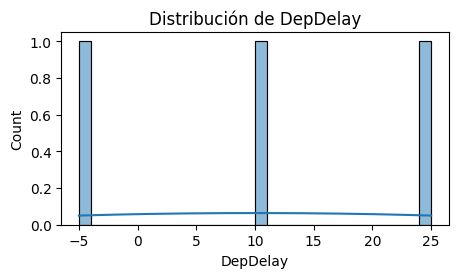

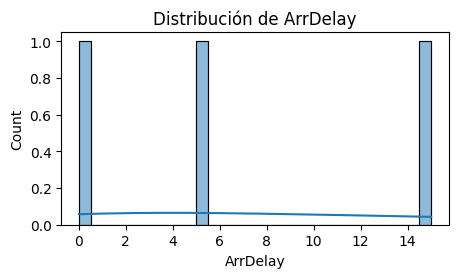

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1 DepDelay
plt.figure(figsize=(5,2.5))
sns.histplot(df_flights['DepDelay'], bins=30, kde=True)
plt.title('Distribución de DepDelay')
plt.show()

# 2 ArrDelay
plt.figure(figsize=(5,2.5))
sns.histplot(df_flights['ArrDelay'], bins=30, kde=True)
plt.title('Distribución de ArrDelay')
plt.show()


In [18]:
# Respondemos las siguientes preguntas:
# What are the average (mean) departure and arrival delays?

mean_dep_delay = df_flights['DepDelay'].mean()
mean_arr_delay = df_flights['ArrDelay'].mean()

print(f"El retraso promedio en salida es {mean_dep_delay:.2f} minutos")
print(f"El retraso promedio en llegada es {mean_arr_delay:.2f} minutos")



El retraso promedio en salida es 10.00 minutos
El retraso promedio en llegada es 6.67 minutos


In [19]:
# How do the carriers compare in terms of arrival delay performance?

# Retraso promedio por aerolínea
carrier_delay = df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values()
print(carrier_delay)


Carrier
UA     0.0
AA     5.0
DL    15.0
Name: ArrDelay, dtype: float64


In [20]:
# Is there a noticable difference in arrival delays for different days of the week?

# Retraso promedio por día de la semana
day_delay = df_flights.groupby('DayOfWeek')['ArrDelay'].mean().sort_values()
print(day_delay)


DayOfWeek
5     0.0
2     5.0
7    15.0
Name: ArrDelay, dtype: float64


In [21]:
# Which departure airport has the highest average departure delay?

# Retraso promedio por aeropuerto de salida
origin_delay = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
print(origin_delay.head(1))


OriginAirportName
Chicago O Hare Intl    25.0
Name: DepDelay, dtype: float64
